<a href="https://colab.research.google.com/github/vahadruya/Capstone_Regression_NYC_Taxi_Trip_Duration_Prediction/blob/main/Iterations_Notebooks_and_Results/PWHS_1111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Iteration 8 - In this notebook, all of the four features, viz., the **passenger_count**, **extrene_weather**, **holiday** and **store_and_fwd_flag**, have been included.

## Initial

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE 1 - REGRESSION/Input data/'
df = pd.read_csv('NYC Taxi Data.csv', parse_dates = ['pickup_datetime', 'dropoff_datetime'])

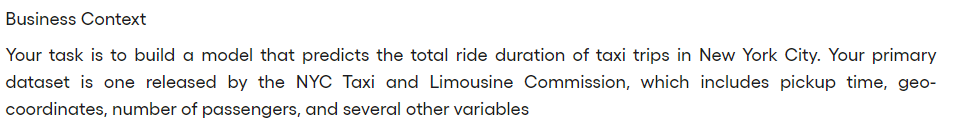

![image](https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/Regression_NYC_Taxi_Trip_Time_Prediction_91a23744ad.png)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
data = df.copy()

## Columns

### Dropoff datetime, ID

In [ ]:
((data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds() - data['trip_duration']).value_counts()

0.000000e+00    1220647
1.136868e-13      82271
5.684342e-14      79253
2.842171e-14      33925
2.273737e-13      29992
1.421085e-14       6808
4.547474e-13       4090
7.105427e-15       1021
3.552714e-15        383
1.776357e-15        148
9.094947e-13         65
7.275958e-12         20
3.637979e-12         15
1.818989e-12          4
2.328306e-10          2
dtype: int64

In [ ]:
data['id'].nunique()

1458644

In [ ]:
data = data.drop(['id', 'dropoff_datetime'], axis = 1)

### Pickup, Dropoff coordinates

In [ ]:
# Containing within the box of nYC

data = data[
    data['pickup_latitude'].between(40.46, 40.93) &
    data['dropoff_latitude'].between(40.46, 40.93) &
    data['pickup_longitude'].between(-74.3, -73.65) &
    data['dropoff_longitude'].between(-74.3, -73.65)
]

### Holidays

In [ ]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import holidays

In [ ]:
nyc_holidays = holidays.UnitedStates(state = 'NY', years = [2016])

In [ ]:
nyc_holidays_ = list(nyc_holidays.keys())
nyc_holidays_

[datetime.date(2016, 1, 1),
 datetime.date(2016, 1, 18),
 datetime.date(2016, 2, 12),
 datetime.date(2016, 2, 15),
 datetime.date(2016, 5, 30),
 datetime.date(2016, 7, 4),
 datetime.date(2016, 9, 5),
 datetime.date(2016, 10, 10),
 datetime.date(2016, 11, 8),
 datetime.date(2016, 11, 11),
 datetime.date(2016, 11, 24),
 datetime.date(2016, 12, 25),
 datetime.date(2016, 12, 26)]

In [ ]:
data['holiday'] = data['pickup_datetime'].dt.date.isin(nyc_holidays).map({True : 1, False : 0})

In [ ]:
data[data['holiday'] == 1]

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,holiday
44,2,2016-02-12 07:41:56,1,-73.979645,40.739632,-73.994728,40.723495,N,559,1
52,2,2016-02-15 09:25:15,6,-73.977753,40.754631,-74.001678,40.756420,N,634,1
121,1,2016-01-18 11:13:59,1,-73.951576,40.766468,-73.960213,40.760540,N,297,1
164,1,2016-01-01 10:45:24,1,-74.001610,40.740810,-73.996223,40.725903,N,383,1
190,2,2016-02-15 17:52:27,5,-74.007500,40.740952,-74.016647,40.704910,N,586,1
...,...,...,...,...,...,...,...,...,...,...
1458575,2,2016-05-30 03:52:41,1,-74.003891,40.751667,-74.001350,40.746571,N,206,1
1458602,1,2016-05-30 14:42:12,1,-74.015457,40.708027,-74.015396,40.708138,N,26,1
1458623,1,2016-01-18 20:35:30,1,-73.991081,40.737408,-73.987671,40.722622,N,554,1
1458628,2,2016-05-30 03:08:19,2,-73.988632,40.721378,-73.975548,40.728519,N,351,1


In [ ]:
data[data['holiday'] == 1]['trip_duration'].mean(), data[data['holiday'] == 1]['trip_duration'].median(), data[data['holiday'] == 0]['trip_duration'].mean(), data[data['holiday'] == 0]['trip_duration'].median(), data['trip_duration'].mean(), data['trip_duration'].median()

(858.7513415338892, 583.0, 961.0434775572922, 664.0, 958.4933444105466, 662.0)

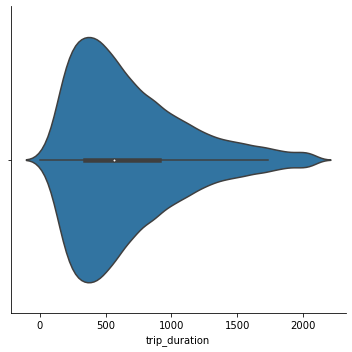

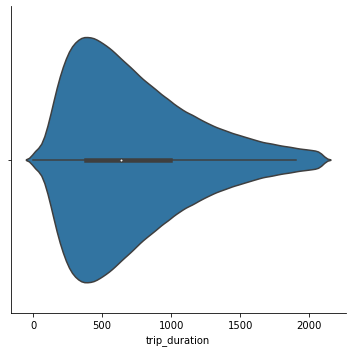

In [ ]:
sns.catplot(data = data[(data['holiday'] == 1) & (data['trip_duration'] < 2100)], x = 'trip_duration', kind = 'violin')
sns.catplot(data = data[(data['holiday'] == 0) & (data['trip_duration'] < 2100)], x = 'trip_duration', kind = 'violin')

### Weather

https://www.weather.gov/okx/stormevents

In [ ]:
dates = ['0110', '0113', '0117', '0123',
        '0205', '0208', '0215', '0216',
        '0224', '0225', '0314', '0315',
        '0328', '0329', '0403', '0404',
        '0530', '0628']

weather_event = ['2016' + x for x in dates]

In [ ]:
data.sort_values('pickup_datetime')

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,holiday
96469,2,2016-01-01 00:00:17,5,-73.981743,40.719158,-73.938828,40.829182,N,849,1
223872,1,2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,N,1294,1
713067,2,2016-01-01 00:01:01,5,-73.965279,40.801041,-73.947479,40.815170,N,408,1
652463,1,2016-01-01 00:01:14,1,-73.982292,40.751331,-73.991341,40.750340,N,280,1
722901,1,2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,N,736,1
...,...,...,...,...,...,...,...,...,...,...
853710,2,2016-06-30 23:58:52,1,-73.982750,40.745289,-73.969002,40.757950,N,472,0
419031,1,2016-06-30 23:59:09,2,-73.955109,40.689564,-73.978203,40.685802,N,754,0
1008720,1,2016-06-30 23:59:10,2,-73.873093,40.774097,-73.926704,40.856739,N,2546,0
405743,2,2016-06-30 23:59:37,5,-73.998291,40.722618,-73.971779,40.762470,N,1442,0


In [ ]:
weather_event = pd.Series(pd.to_datetime(weather_event, format = '%Y%m%d')).dt.date

data['extreme_weather'] = data['pickup_datetime'].dt.date.isin(weather_event).map({True : 1, False : 0})

In [ ]:
data['extreme_weather'].value_counts().values[1]/(data['extreme_weather'].value_counts().values[1]+data['extreme_weather'].value_counts().values[0])

0.09128959206172688

(892.7535245137824, 621.0, 965.097606107299, 666.0, 958.4933444105466, 662.0)

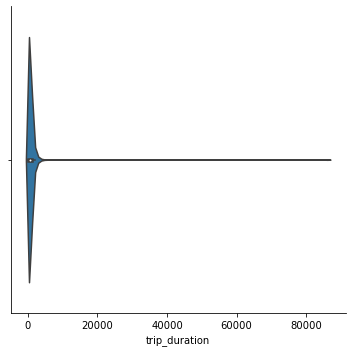

In [ ]:
sns.catplot(data = data[data['extreme_weather'] == 1], x = 'trip_duration', kind = 'violin')

data[data['extreme_weather'] == 1]['trip_duration'].mean(), data[data['extreme_weather'] == 1]['trip_duration'].median(), data[data['extreme_weather'] == 0]['trip_duration'].mean(), data[data['extreme_weather'] == 0]['trip_duration'].median(), data['trip_duration'].mean(), data['trip_duration'].median()

### Pickup datetime -> other variables

In [ ]:
data['day_of_week'] = data['pickup_datetime'].dt.weekday

In [ ]:
data['day_of_month'] = data['pickup_datetime'].dt.day

In [ ]:
data['month'] = data['pickup_datetime'].dt.month

In [ ]:
data['hour_of_day'] = data['pickup_datetime'].dt.hour

In [ ]:
data = data.drop(['pickup_datetime'], axis = 1)

### passenger count

In [ ]:
data['passenger_count'].value_counts()

1    1032787
2     210176
5      78058
3      59862
6      48322
4      28378
0         60
7          2
9          1
8          1
Name: passenger_count, dtype: int64

In [ ]:
data = data[~data['passenger_count'].isin([0, 7, 8, 9])]
# data = data.drop('passenger_count', axis = 1)

### Store_and_fwd_flag

In [ ]:
data['store_and_fwd_flag'].value_counts()

N    1449562
Y       8021
Name: store_and_fwd_flag, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

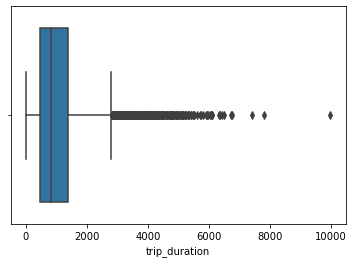

In [ ]:
sns.boxplot(data[data['store_and_fwd_flag'] == 'Y']['trip_duration'].reset_index(drop = True))

In [ ]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'N':0, 'Y':1})
# data = data.drop('store_and_fwd_flag', axis = 1)

### distance and trip_duration

Considering the shortest distance as a feature in your analysis of NYC taxi trips can provide valuable insights. While it is true that taxis may take different routes to reach their destinations, the shortest distance can still be a useful indicator of the overall distance traveled. Here are a few reasons why the shortest distance can be a relevant feature:

1. Distance Estimation: The shortest distance can serve as a good estimation of the actual distance traveled by the taxi. It provides a baseline reference point for understanding the distance covered during a trip, irrespective of the specific route taken.

2. Trip Duration Estimation: In many cases, there is a correlation between the distance traveled and the duration of the trip. By including the shortest distance as a feature, you can capture some of the variability in trip durations that can be attributed to differences in distances traveled.

3. Efficiency Analysis: The shortest distance can help identify trips where the actual distance traveled significantly deviates from the optimal route. By comparing the actual distance with the shortest distance, you can gain insights into factors that may influence trip duration, such as traffic congestion or detours taken by the taxi.

It's important to note that while the shortest distance is a relevant feature, it should be considered alongside other variables to build a comprehensive regression model. Additional factors like traffic conditions, time of day, day of the week, and other relevant features can provide a more accurate prediction of trip duration.

Ultimately, the shortest distance can provide a useful baseline for understanding trip distances and their potential impact on trip duration. Including it as a feature in your analysis can help capture some of the variability in trip durations and contribute to a more robust regression model.

**Haversine vs geodesic** (19.6 vs 227.74secs)

The choice between the Haversine formula and the geodesic distance calculation depends on the specific use case and the level of accuracy required for your analysis.

The Haversine formula is a simple trigonometric formula that calculates the great-circle distance between two points on a sphere, assuming a perfect sphere Earth model. It is widely used for calculating distances between points on Earth, and it provides reasonably accurate results for most practical purposes. However, it does not take into account the Earth's ellipsoidal shape and can introduce small errors when calculating distances over long distances or in regions near the poles.

On the other hand, the geodesic distance calculation, as implemented in libraries like geopy, takes into account the actual shape of the Earth, which is an oblate spheroid (ellipsoid). Geodesic distance algorithms provide more accurate results for distances between points on Earth's surface, considering the flattening of the Earth at the poles and bulging at the equator.

For computing the shortest distances within New York City (NYC), which is a relatively small area, using the Haversine formula would generally be sufficient. The errors introduced by assuming a perfect sphere model are usually negligible for distances within a localized region like NYC. The Haversine formula is computationally simpler and faster compared to geodesic distance calculations, making it more practical for shorter distances.

However, if you require highly accurate distances or are dealing with longer distances, such as computing distances between locations outside of NYC, using the geodesic distance calculation would be more appropriate to account for the Earth's true shape and reduce potential errors.

Ultimately, consider the level of accuracy required for your specific analysis and the trade-off between accuracy and computational complexity when choosing between the Haversine formula and geodesic distance calculations.

In [ ]:
!pip install haversine

In [ ]:
from haversine import haversine
data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,holiday,extreme_weather,day_of_week,day_of_month,month,hour_of_day
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0,1,0,14,3,17
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,0,6,12,6,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,0,0,1,19,1,11
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,0,0,2,6,4,19
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,0,0,5,26,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,0,0,4,8,4,13
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,0,1,6,10,1,7
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,0,764,0,0,4,22,4,6
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,0,0,1,5,1,15


In [ ]:
def calculate_distance(row):
    coords1 = (row['pickup_latitude'], row['pickup_longitude'])
    coords2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return haversine(coords1, coords2)

In [ ]:
data['distance'] =  data.apply(lambda x: calculate_distance(x), axis=1)

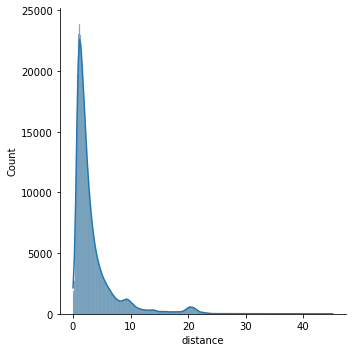

In [ ]:
sns.displot(data['distance'], kde = True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

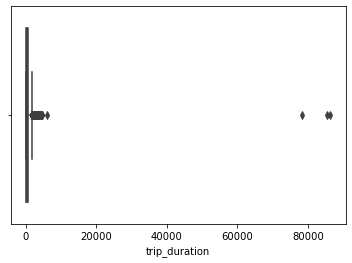

In [ ]:
sns.boxplot(data[data['distance'] == 0]['trip_duration'].reset_index(drop = True))

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance'>

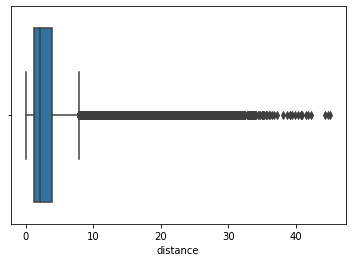

In [ ]:
sns.boxplot(data['distance'])

In [ ]:
td_iqr = data['trip_duration'].quantile(0.75) - data['trip_duration'].quantile(0.25)
max_q3 = data['trip_duration'].quantile(0.75) + 1.5*td_iqr
max_q3

2089.5

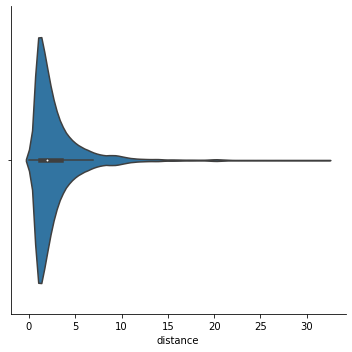

In [ ]:
sns.catplot(data = data[data['trip_duration'] <= max_q3], x = 'distance', kind = 'violin')

<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

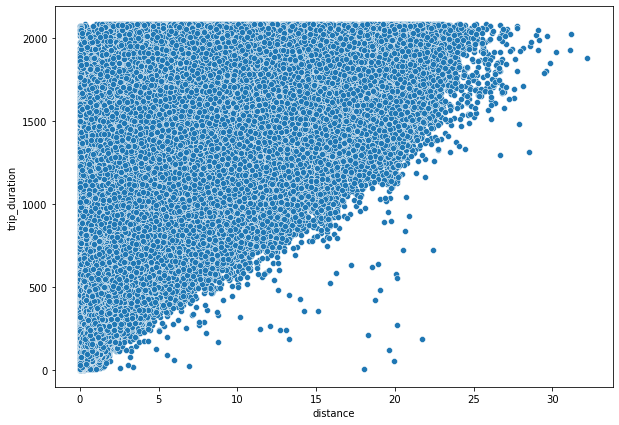

In [ ]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'distance', y = 'trip_duration', data = data[(data['trip_duration'] <= max_q3) & (data['distance'] != 0)])

In [ ]:
dat1 = data[(data['trip_duration'] <= max_q3) & (data['distance'] != 0)]
dat2 = data[data['trip_duration'] <= max_q3]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance'>

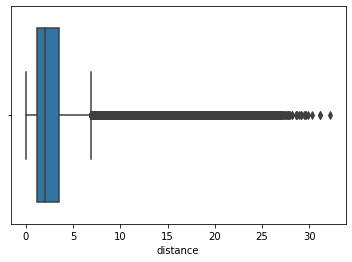

In [ ]:
sns.boxplot(dat2['distance'])

## Variable transformation and scaling

### transform

In [ ]:
dat1t = dat1.copy()
dat2t = dat2.copy()

In [ ]:
dat1t['trip_duration'] = np.sqrt(dat1t['trip_duration'])
dat2t['trip_duration'] = np.sqrt(dat2t['trip_duration'])

In [ ]:
dat1t['distance'] = np.sqrt(dat1t['distance'])
dat2t['distance'] = np.sqrt(dat2t['distance'])

In [ ]:
dat1t

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,holiday,extreme_weather,day_of_week,day_of_month,month,hour_of_day,distance
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,21.330729,0,1,0,14,3,17,1.224142
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,25.748786,0,0,6,12,6,0,1.343693
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,20.712315,0,0,2,6,4,19,1.218811
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,20.856654,0,0,5,26,3,13,1.090225
5,2,6,-73.982857,40.742195,-73.992081,40.749184,0,21.047565,0,0,5,30,1,22,1.048305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,0,27.892651,0,0,4,8,4,13,1.106834
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,0,25.592968,0,1,6,10,1,7,2.459643
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,0,27.640550,0,0,4,22,4,6,2.797252
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,0,19.313208,0,0,1,5,1,15,1.045259


### split

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
X1 = dat1.drop('trip_duration', axis = 1)
Y1 = dat1['trip_duration']

X2 = dat2.drop('trip_duration', axis = 1)
Y2 = dat2['trip_duration']

X1t = dat1t.drop('trip_duration', axis = 1)
Y1t = dat1t['trip_duration']

X2t = dat2t.drop('trip_duration', axis = 1)
Y2t = dat2t['trip_duration']

In [ ]:
rs = 8

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = rs)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = rs)

X1t_train, X1t_test, Y1t_train, Y1t_test = train_test_split(X1t, Y1t, test_size = 0.2, random_state = rs)

X2t_train, X2t_test, Y2t_train, Y2t_test = train_test_split(X2t, Y2t, test_size = 0.2, random_state = rs)

### scaling

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler1 = StandardScaler()
X1s_train = scaler1.fit_transform(X1_train)
X1s_test = scaler1.transform(X1_test)

scaler2 = StandardScaler()
X2s_train = scaler2.fit_transform(X2_train)
X2s_test = scaler2.transform(X2_test)

scaler1t = StandardScaler()
X1ts_train = scaler1t.fit_transform(X1t_train)
X1ts_test = scaler1t.transform(X1t_test)

scaler2t = StandardScaler()
X2ts_train = scaler2t.fit_transform(X2t_train)
X2ts_test = scaler2t.transform(X2t_test)

## reference - datacouples

In [ ]:
# # Couples:

# (X1_train, Y1_train)
# (X2_train, Y2_train)
# (X1t_train, Y1t_train)
# (X2t_train, Y2t_train)

# (X1s_train, Y1_train)
# (X2s_train, Y2_train)
# (X1ts_train, Y1t_train)
# (X2ts_train, Y2t_train)

In [ ]:
# input_names = {'s1': [X1_train, X1_test, Y1_train, Y1_test],
#                's2': [X2_train, X2_test, Y2_train, Y2_test],
#                's1t': [X1t_train, X1t_test, Y1t_train, Y1t_test],
#                's2t': [X2t_train, X2t_test, Y2t_train, Y2t_test],
#                's1s': [X1s_train, X1s_test, Y1_train, Y1_test],
#                's2s': [X2s_train, X2s_test, Y2_train, Y2_test],
#                's1ts': [X1ts_train, X1ts_test, Y1t_train, Y1t_test],
#                's2ts': [X2ts_train, X2ts_test, Y2t_train, Y2t_test],
#                }

input_names = {
            's1t': [X1t_train, X1t_test, Y1t_train, Y1t_test],
            's2t': [X2t_train, X2t_test, Y2t_train, Y2t_test],
            's1ts': [X1ts_train, X1ts_test, Y1t_train, Y1t_test]
            }

## Model implementation

### initial

In [ ]:
sns.set()

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def evaluate_model(y_true, y_pred, X_true):
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r2 = r2_score(y_true, y_pred)
  adj_r2 = 1 - (1 - r2) * ((X_true.shape[0] - 1) / (X_true.shape[0] - X_true.shape[1] - 1))
  return mse, rmse, r2, adj_r2

In [ ]:
score_names = ['mse_train', 'rmse_train', 'r2_train', 'adj_r2_train', 'mse_test', 'rmse_test', 'r2_test', 'adj_r2_test']
scores = dict()
for x in input_names:
  scores[x] = {'mse_train':[], 'rmse_train':[], 'r2_train':[], 'adj_r2_train':[], 'mse_test':[], 'rmse_test':[], 'r2_test':[], 'adj_r2_test':[]}

In [ ]:
model_names = ['Linear Regression', 'Decision Tree', 'Polynomial Regression', 'Lasso', 'Ridge', 'Elastic Net', 'XGBoost']

### 1. linear regression

In [ ]:
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  reg = LinearRegression()
  reg.fit(X_train, Y_train)
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1t:
Train scores = (28.29717366083059, 5.319508780031347, 0.5821268779244142, 0.5821215708047918)
Test scores = (28.25527946509721, 5.315569533464614, 0.582520643248463, 0.5824994339464105)

Iteration s2t:
Train scores = (29.01641477960296, 5.386688665553539, 0.5745811588786247, 0.5745757780189)
Test scores = (28.85453558537897, 5.371641796078641, 0.5770735524368659, 0.5770521543043208)

Iteration s1ts:
Train scores = (28.29717366083071, 5.3195087800313585, 0.5821268779244124, 0.58212157080479)
Test scores = (28.255279465097335, 5.315569533464625, 0.5825206432484611, 0.5824994339464086)



In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 0
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

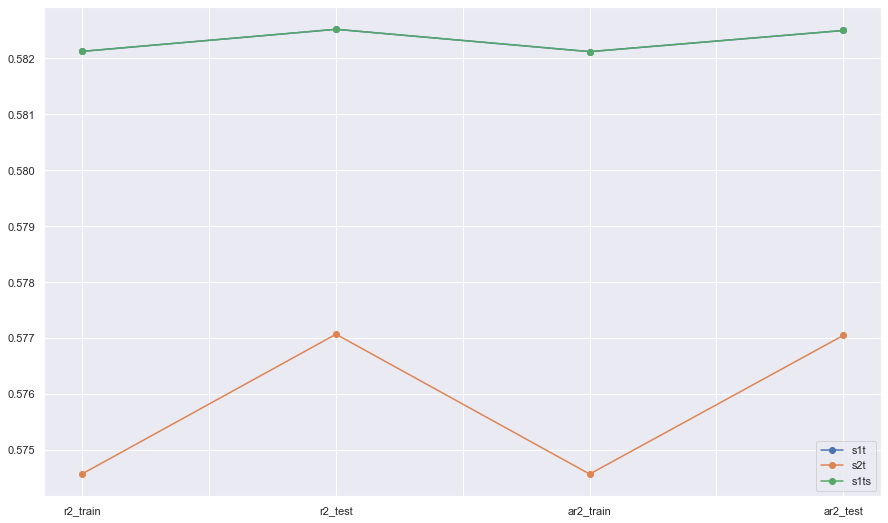

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.582127,0.574581,0.582127
r2_test,0.582521,0.577074,0.582521
ar2_train,0.582122,0.574576,0.582122
ar2_test,0.582499,0.577052,0.582499


### 2. Decision tree

In [ ]:
param_dt = {'max_depth' : [20, 25], 'min_samples_split' : [40, 60, 80]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]
  dt = DecisionTreeRegressor()
  dt_grid = GridSearchCV(estimator = dt, param_grid = param_dt, cv = 5, scoring = 'r2', n_jobs = 3)
  dt_grid.fit(X_train, Y_train)

  reg = dt_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {dt_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1t:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (13.93474478012179, 3.732927106189162, 0.7942213107079243, 0.794218697254074)
Test scores = (18.099162027822956, 4.254310993312895, 0.73258001109311, 0.7325664252924522)

Iteration s2t:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (14.234969744147431, 3.7729258863841246, 0.7912966030451849, 0.7912939632850368)
Test scores = (18.488072245935204, 4.299775836707677, 0.7290167885694198, 0.7290030780655979)

Iteration s1ts:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (13.93474478012179, 3.732927106189162, 0.7942213107079243, 0.794218697254074)
Test scores = (18.09752660126106, 4.2541187808124326, 0.7326041749606067, 0.7325905903875515)

CPU times: total: 34.9 s
Wall time: 8min 42s


In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 1
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

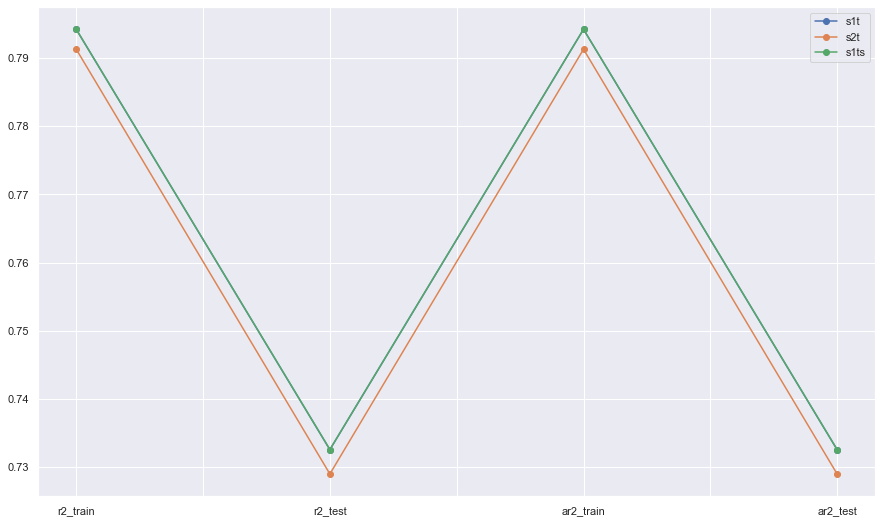

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.794221,0.791297,0.794221
r2_test,0.732580,0.729017,0.732604
ar2_train,0.794219,0.791294,0.794219
ar2_test,0.732566,0.729003,0.732591


### 3. Polynomial regression

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
    X_train, X_test, Y_train, Y_test = input_names[input]

    poly_reg = PolynomialFeatures(degree = 2)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)

    reg = LinearRegression()
    reg.fit(X_train_poly, Y_train)

    Y_train_pred = reg.predict(X_train_poly)
    Y_test_pred = reg.predict(X_test_poly)

    train_scores = evaluate_model(Y_train, Y_train_pred, X_train_poly)
    test_scores = evaluate_model(Y_test, Y_test_pred, X_test_poly)
    print(f'Iteration {input}:')
    print(f'Train scores = {train_scores}')
    print(f'Test scores = {test_scores}\n')

    for i, score in enumerate(score_names):
        if 'train' in score:
            scores[input][score].append(train_scores[i])
        elif 'test' in score:
            scores[input][score].append(test_scores[i-4])

Iteration s1t:
Train scores = (23.352119725139815, 4.832403100439761, 0.6551520200006922, 0.6551144762982493)
Test scores = (23.27852657576359, 4.824782541810936, 0.6560535062844437, 0.6559036749825242)

Iteration s2t:
Train scores = (24.40651291206481, 4.940294820358883, 0.6421683892469308, 0.6421295913257193)
Test scores = (24.34027592046855, 4.933586516974092, 0.6432399198631893, 0.6430851426961843)

Iteration s1ts:
Train scores = (23.347443725599287, 4.83191925901078, 0.6552210719332365, 0.6551835357484981)
Test scores = (23.272879528060614, 4.824197293650065, 0.6561369429337076, 0.655987147978784)

CPU times: total: 32 s
Wall time: 34.1 s


In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 2
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

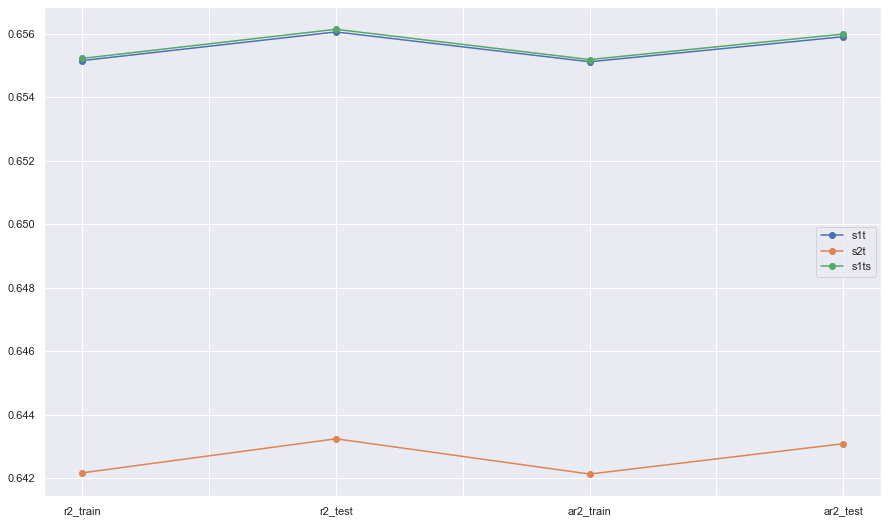

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.655152,0.642168,0.655221
r2_test,0.656054,0.643240,0.656137
ar2_train,0.655114,0.642130,0.655184
ar2_test,0.655904,0.643085,0.655987


### 4. Lasso

In [ ]:
param_lasso = {'alpha' : [0.00001, 0.001, 0.1, 1]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  lasso = Lasso()
  lasso_grid = GridSearchCV(estimator = lasso, param_grid = param_lasso, cv = 5, scoring = 'r2')
  lasso_grid.fit(X_train, Y_train)

  reg = lasso_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {lasso_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1t:
Best params = {'alpha': 1e-05}
Train scores = (28.297174428914477, 5.319508852226348, 0.5821268665818817, 0.5821215594621152)
Test scores = (28.255303086517532, 5.315571755372844, 0.5825202942356218, 0.5824990849158382)

Iteration s2t:
Best params = {'alpha': 1e-05}
Train scores = (29.01641553980044, 5.386688736116135, 0.5745811477331288, 0.5745757668732632)
Test scores = (28.85457683956683, 5.371645636075301, 0.577072947766343, 0.5770515496032045)

Iteration s1ts:
Best params = {'alpha': 1e-05}
Train scores = (28.29717366249158, 5.319508780187469, 0.5821268778998858, 0.5821215707802629)
Test scores = (28.255281100097996, 5.3155696872581775, 0.5825206190908865, 0.5824994097876067)

CPU times: total: 51.5 s
Wall time: 30 s


In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 3
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

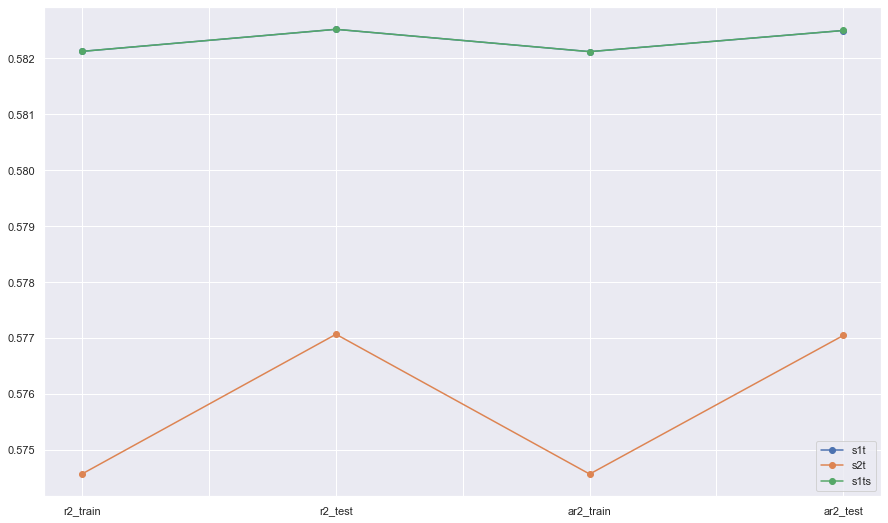

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.582127,0.574581,0.582127
r2_test,0.582520,0.577073,0.582521
ar2_train,0.582122,0.574576,0.582122
ar2_test,0.582499,0.577052,0.582499


### 5. Ridge

In [ ]:
param_ridge = {'alpha' : [0.000001, 0.00001, 0.001, 0.1, 1, 10]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  ridge = Ridge()
  ridge_grid = GridSearchCV(estimator = ridge, param_grid = param_ridge, cv = 5, scoring = 'r2')
  ridge_grid.fit(X_train, Y_train)

  reg = ridge_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {lasso_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1t:
Best params = {'alpha': 1e-05}
Train scores = (28.29717367919727, 5.3195087817576985, 0.5821268776531876, 0.5821215705335616)
Test scores = (28.25528357864701, 5.3155699203986595, 0.5825205824696578, 0.5824993731645175)

Iteration s2t:
Best params = {'alpha': 1e-05}
Train scores = (29.01641479608452, 5.38668866708338, 0.5745811586369833, 0.5745757777772555)
Test scores = (28.854541140524574, 5.37164231315941, 0.5770734710140341, 0.5770520728773694)

Iteration s1ts:
Best params = {'alpha': 1e-05}
Train scores = (28.29717366575738, 5.319508780494434, 0.5821268778516586, 0.5821215707320352)
Test scores = (28.255281014764826, 5.315569679231458, 0.582520620351707, 0.5824994110484913)

CPU times: total: 36.5 s
Wall time: 19.9 s


In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 4
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

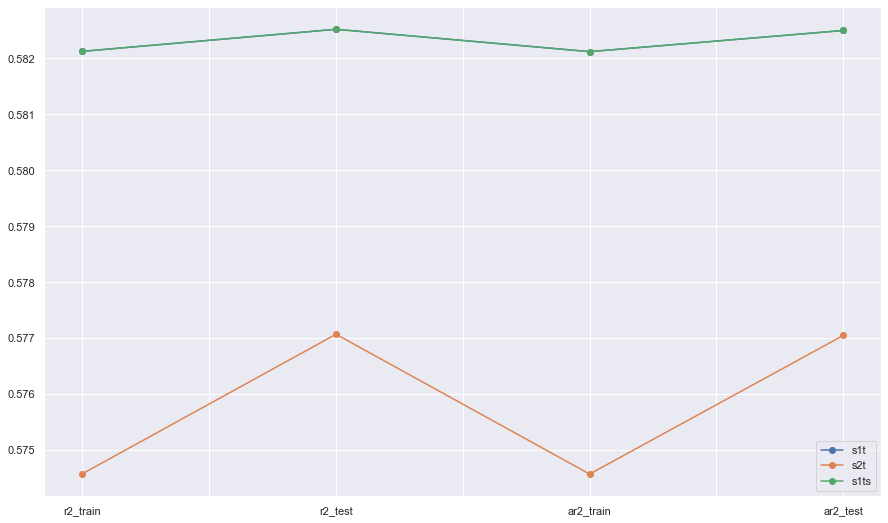

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.582127,0.574581,0.582127
r2_test,0.582521,0.577073,0.582521
ar2_train,0.582122,0.574576,0.582122
ar2_test,0.582499,0.577052,0.582499


### 6. ELastic Net

In [ ]:
param_elastic = {'alpha' : [0.00001, 0.001, 0.1, 10], 'l1_ratio' : [0.1, 0.5, 0.9]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  elastic = ElasticNet()
  elastic_grid = GridSearchCV(estimator = elastic, param_grid = param_elastic, cv = 5, scoring = 'r2')
  elastic_grid.fit(X_train, Y_train)

  reg = elastic_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {elastic_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1t:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.9}
Train scores = (28.297178766473714, 5.319509259929314, 0.5821268025278018, 0.5821214954072218)
Test scores = (28.2553500955335, 5.3155761771922245, 0.5825195996647622, 0.5824983903096923)

Iteration s2t:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.9}
Train scores = (29.016419550159803, 5.3866891083633, 0.574581088935981, 0.5745757080753717)
Test scores = (28.854637940256367, 5.371651323406645, 0.5770720522018487, 0.5770506539933986)

Iteration s1ts:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.1}
Train scores = (28.29717366600207, 5.319508780517434, 0.5821268778480453, 0.5821215707284217)
Test scores = (28.255281169536943, 5.315569693789834, 0.5825206180649073, 0.5824994087615754)

CPU times: total: 2min 29s
Wall time: 1min 17s


In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 5
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

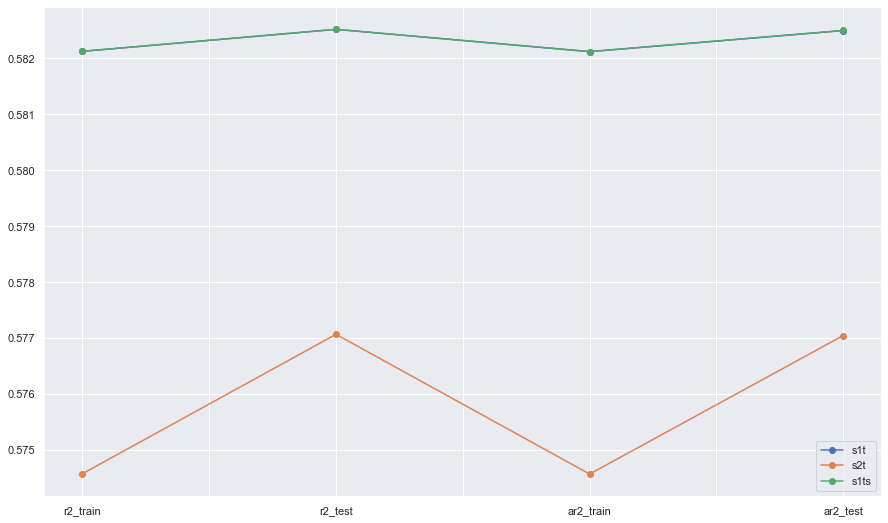

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.582127,0.574581,0.582127
r2_test,0.582520,0.577072,0.582521
ar2_train,0.582121,0.574576,0.582122
ar2_test,0.582498,0.577051,0.582499


### 7. XGBoost

In [ ]:
# param_xg = {'max_depth' : [20, 25], 'learning_rate' : [0.01, 0.1, 0.3], 'n_estimators' : [50, 100, 150]}

param_xg = {'max_depth' : [15], 'learning_rate' : [0.1], 'n_estimators' : [100]}

In [ ]:
%%time

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]
  xg = xgb.XGBRegressor()
  xg_grid = GridSearchCV(estimator = xg, param_grid = param_xg, cv = 5, scoring = 'r2', n_jobs = 3)
  xg_grid.fit(X_train, Y_train)

  reg = xg_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {xg_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

C:\Users\User\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Iteration s1t:
Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Train scores = (5.8924848128643745, 2.4274440905743586, 0.9129838529088514, 0.9129827477765102)
Test scores = (12.796041980150704, 3.5771555711417844, 0.8109350367092325, 0.810925431597389)

Iteration s2t:
Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Train scores = (6.003759757631545, 2.4502570799064216, 0.9119769779325677, 0.9119758645838194)
Test scores = (13.150492662079635, 3.6263608014205695, 0.8072507135378537, 0.8072409613107148)

Iteration s1ts:
Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Train scores = (5.975956849621315, 2.444577028776413, 0.9117511955055464, 0.9117500747180699)
Test scores = (12.814086126297656, 3.5796768186943435, 0.8106684295947686, 0.810658810938421)

CPU times: total: 41min 7s
Wall time: 1h 22min 54s


In [ ]:
# Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 80}
# Train scores = (18696.025470614226, 136.733410220817, 0.9065004479694372, 0.9064994301367559)
# Test scores = (40295.50115847913, 200.73739352317776, 0.7983430099943146, 0.7983342287772954)

# CPU times: total: 10min 40s
# Wall time: 22min 14s

In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 6
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

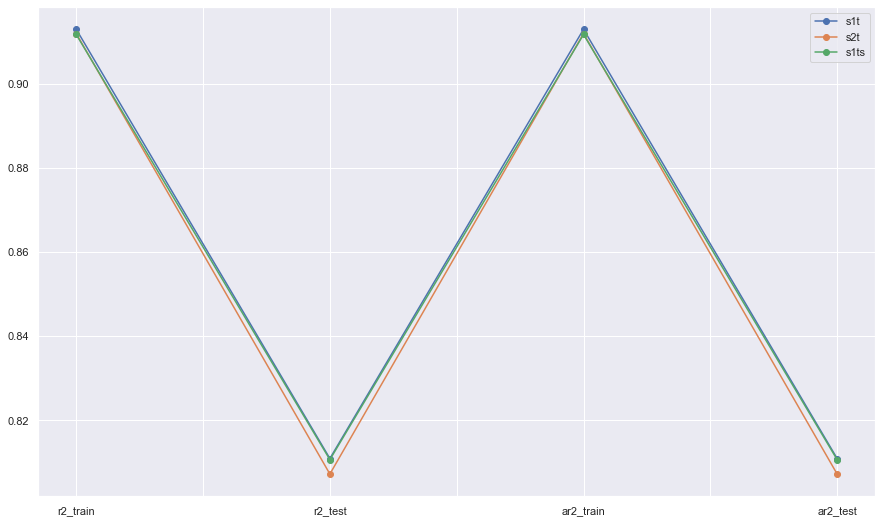

In [ ]:
r2s_df.T.iloc[:,:].plot(marker = 'o', figsize = (15, 9))

In [ ]:
r2s_df.T

,s1t,s2t,s1ts
r2_train,0.912984,0.911977,0.911751
r2_test,0.810935,0.807251,0.810668
ar2_train,0.912983,0.911976,0.911750
ar2_test,0.810925,0.807241,0.810659


## pickle

In [ ]:
import pickle

with open('scores_PWHS0111.pkl', 'wb') as f:
    pickle.dump(scores, f)

# with open('scores_PWHS0100.pkl', 'rb') as f:
#     scores = pickle.load(f)

In [ ]:
scores

{'s1t': {'mse_train': [28.29717366083059,
   13.93474478012179,
   23.352119725139815,
   28.297174428914477,
   28.29717367919727,
   28.297178766473714,
   5.8924848128643745],
  'rmse_train': [5.319508780031347,
   3.732927106189162,
   4.832403100439761,
   5.319508852226348,
   5.3195087817576985,
   5.319509259929314,
   2.4274440905743586],
  'r2_train': [0.5821268779244142,
   0.7942213107079243,
   0.6551520200006922,
   0.5821268665818817,
   0.5821268776531876,
   0.5821268025278018,
   0.9129838529088514],
  'adj_r2_train': [0.5821215708047918,
   0.794218697254074,
   0.6551144762982493,
   0.5821215594621152,
   0.5821215705335616,
   0.5821214954072218,
   0.9129827477765102],
  'mse_test': [28.25527946509721,
   18.099162027822956,
   23.27852657576359,
   28.255303086517532,
   28.25528357864701,
   28.2553500955335,
   12.796041980150704],
  'rmse_test': [5.315569533464614,
   4.254310993312895,
   4.824782541810936,
   5.315571755372844,
   5.3155699203986595,
   5.3

In [ ]:
# path2 = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE ROUGHS/#CAPSTONE REGRESSION/PWHS_1001.csv'

In [ ]:
dff = pd.DataFrame(scores['s1t']['r2_test'], index = model_names)
dff.rename(columns = {0 : 's1t'}, inplace = True)
for input in list(input_names.keys())[1:]:
  dff[input] = scores[input]['r2_test']
dff

,s1t,s2t,s1ts
Linear Regression,0.582521,0.577074,0.582521
Decision Tree,0.732580,0.729017,0.732604
Polynomial Regression,0.656054,0.643240,0.656137
Lasso,0.582520,0.577073,0.582521
Ridge,0.582521,0.577073,0.582521
Elastic Net,0.582520,0.577072,0.582521
XGBoost,0.810935,0.807251,0.810668


In [ ]:
dff.to_csv('PWHS_0111.csv')

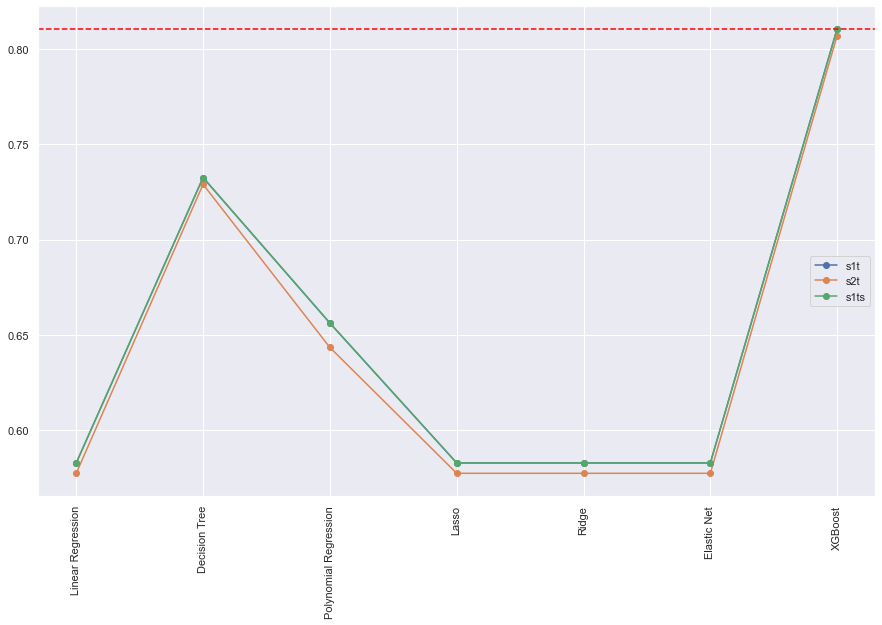

In [ ]:
for itr in dff.columns[:]:
  ax = dff[itr].plot(figsize = (15, 9), marker = 'o', title = None)
  plt.xticks(rotation = 90)
  plt.legend(bbox_to_anchor = (1, 0.5))
ax.axhline(dff.max().max(), color = 'red', linestyle = '--')